<a href="https://colab.research.google.com/github/Vincenzo-Miracula/TallerPratico/blob/main/An%C3%A1lisisDatosTextuales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Sentiment Analysis](https://huggingface.co/models)
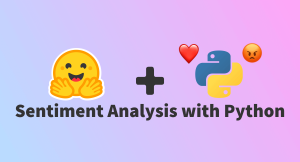
---
* El análisis de sentimiento es una técnica de procesamiento de lenguaje natural que evalúa y determina la emoción o el tono de un texto, generalmente clasificándolo como positivo, negativo o neutro.
* Este proceso ayuda a comprender la opinión, el estado de ánimo o la actitud de los autores hacia un tema específico y se utiliza ampliamente en aplicaciones como la análisis de opiniones de clientes, el monitoreo de redes sociales y la evaluación de reseñas de productos.
* El análisis de sentimiento se basa en algoritmos de aprendizaje automático y procesamiento lingüístico para realizar estas evaluaciones de manera automática.
---





# Bert model

In [ ]:
!pip install transformers
!pip install sentencepiece

In [ ]:
from transformers import pipeline

In [ ]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [ ]:
classifier('La fascinación por la misteriosa tumba de la era de Alejandro Magno')

In [ ]:
def get_sentiment(text):
    results = classifier(text)
    sentiment_label = results[0]['label']
    sentiment_value = results[0]['score']
    return sentiment_label, sentiment_value

In [ ]:
# Estas líneas de código realizan dos operaciones en el DataFrame 'df':
# 1. Utilizan la función 'progress_apply' en la columna 'Title' para aplicar la función 'get_sentiment' a cada fila.
# 2. Luego, aplican la función 'pd.Series' a los resultados de 'get_sentiment', creando así dos nuevas columnas en el DataFrame 'df'.
#    Estas columnas se llaman 'sentiment_label' y 'sentiment_value'.
df[['sentiment_label', 'sentiment_value']] = df['Resumen'].progress_apply(get_sentiment).apply(pd.Series)

# [TweetNLP](http://tweetnlp.org/)

In [ ]:
!pip install tweetnlp

In [7]:
import tweetnlp
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

## Sentiment

In [ ]:
modelSentiment = tweetnlp.load_model('sentiment')

In [ ]:
modelSentiment.sentiment("Yes, including Medicare and social security saving👍")

In [ ]:
modelSentiment.sentiment("Yes, including Medicare and social security saving👍", return_probability=True)

In [ ]:
modelSentiment = tweetnlp.load_model('sentiment', multilingual=True)
modelSentiment.sentiment("Sigue siendo bonito cuando hace buen tiempo ✨")

In [ ]:
modelSentiment.sentiment("Sigue siendo bonito cuando hace buen tiempo ✨", return_probability=True)

In [ ]:
#a['label']

aplicar al dataframe pandas

In [68]:
def get_sentiment(text):
  result = modelSentiment.sentiment(text)
  return result

In [ ]:
.apply(get_sentiment)

## Emotion

In [13]:
modelEmotion = tweetnlp.load_model('emotion')

In [ ]:
modelEmotion.emotion('I love swimming for the same reason I love meditating...the feeling of weightlessness.')

In [ ]:
modelEmotion.emotion('I love swimming for the same reason I love meditating...the feeling of weightlessness.', return_probability=True)

In [45]:
modelEmotion.emotion("Sigue siendo malo cuando hace buen tiempo", return_probability=True)

In [ ]:
#a['label']

aplicar al dataframe pandas

In [63]:
def get_emotion(text):
  result = modelEmotion.emotion(text)
  return result

In [ ]:
.apply(get_emotion)

## NER

In [ ]:
modelNER = tweetnlp.load_model('ner')

In [ ]:
modelNER.ner('Jacob Collier is a Grammy-awarded English artist from London.')

In [32]:
modelNER.ner('Carlo Ancellotti es entrenador del RealMadrid y vive en Canada', return_probability=True)

In [ ]:
#a[0]

aplicar al dataframe pandas

In [50]:
def nerpredict(text):
  result = modelNER.predict(text)
  return result

In [55]:
def extract_ner_info(ner_list):
    types = [item['type'] for item in ner_list]
    entities = [item['entity'] for item in ner_list]
    return types, entities

In [ ]:
df['NER'] = df[''].progress_apply(nerpredict)
df['Type'], df[''] = zip(*df['NER'].progress_apply(extract_ner_info))